In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data03 = pd.read_csv("data03.csv")

In [74]:
data03

,Slope,Curvature,Cachment,Rain,Bedrock,Erosion
0,0.026076,0.002128,42.491984,14605.6,1.0,79.2
1,0.019037,0.005000,46.763294,15791.6,1.0,81.6
2,0.015738,0.001124,47.374272,15977.4,1.0,64.8
3,0.011765,0.000806,47.985067,15977.4,1.0,44.8
4,0.011790,0.001053,67.969707,20606.2,1.0,60.0
5,0.009756,0.001639,130.219140,36769.0,1.0,75.6
6,0.011538,0.001639,202.835270,51586.6,1.0,43.7
7,0.009021,0.001818,209.409100,52485.6,1.0,75.5
8,0.004751,0.001053,209.915500,52485.6,1.0,81.0
9,0.055556,0.007692,10.964999,5626.6,3.0,134.0


In [99]:
x = data03[['Slope','Curvature','Cachment','Rain']]
y = data03[['Erosion']]

In [100]:
def yyplot(y_obs, y_pred):
    yvalues = y_obs
    ymin, ymax, yrange = np.amin(yvalues), np.amax(yvalues), np.ptp(yvalues)
    fig = plt.figure(figsize=(8, 8))
    plt.scatter(y_obs, y_pred)
    plt.plot([ymin - yrange * 0.01, ymax + yrange * 0.01], [ymin - yrange * 0.01, ymax + yrange * 0.01])
    #plt.xlim(ymin - yrange * 0.01, ymax + yrange * 0.01)
    #plt.ylim(ymin - yrange * 0.01, ymax + yrange * 0.01)
    plt.xlabel('y_observed', fontsize=24)
    plt.ylabel('y_predicted', fontsize=24)
    plt.title('Observed-Predicted Plot', fontsize=24)
    plt.tick_params(labelsize=16)
    plt.show()

    return fig

0.39085831060003684 18.06547010519848


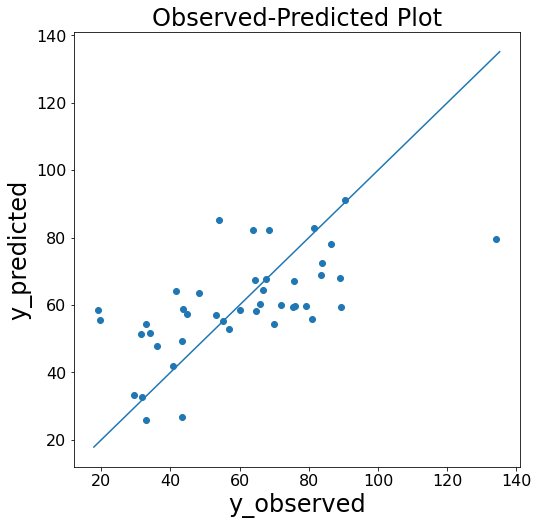

In [101]:
#線形回帰・標準化なし
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

model_lr = LinearRegression()
model_lr.fit(x, y)

y_pred = model_lr.predict(x)

r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(r2,rmse)

fig = yyplot(y, y_pred)

0.39085831060003684 18.06547010519848


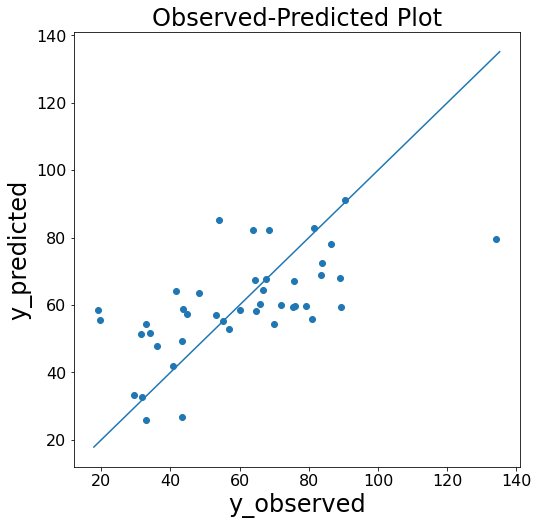

In [102]:
#線形回帰・標準化,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

sscaler = preprocessing.StandardScaler()
sscaler.fit(x)
xs = sscaler.transform(x) 
sscaler.fit(y)
ys = sscaler.transform(y)

model_lrs = LinearRegression()
model_lrs.fit(xs, ys)

#y_pred = model_lrs.predict(xs)
y_pred = sscaler.inverse_transform(model_lrs.predict(xs))

r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(r2,rmse)

fig = yyplot(y, y_pred)

0.39085831060003684 18.06547010519848


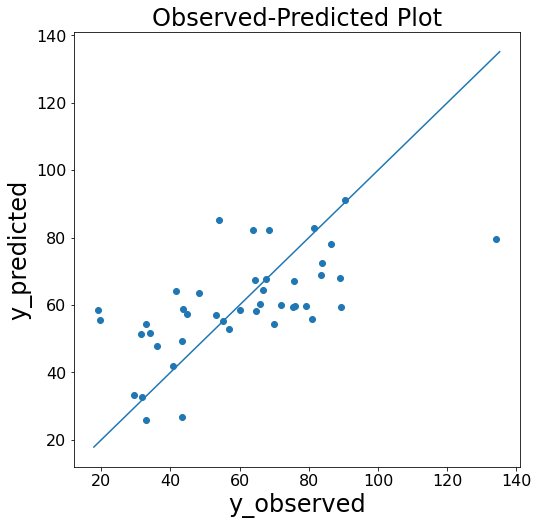

In [103]:
#線形回帰・標準化,RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

sscaler = preprocessing.RobustScaler()
sscaler.fit(x)
xr = sscaler.transform(x) 
sscaler.fit(y)
yr = sscaler.transform(y)

model_lrr = LinearRegression()
model_lrr.fit(xr, yr)

#y_pred = model_lrs.predict(xs)
y_pred = sscaler.inverse_transform(model_lrr.predict(xr))

r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(r2,rmse)

fig = yyplot(y, y_pred)

0.5538443770757012 15.460847307667937
[[-0.42987436  0.24463053 -1.79464719  1.87408883]]
[-7.24412023]


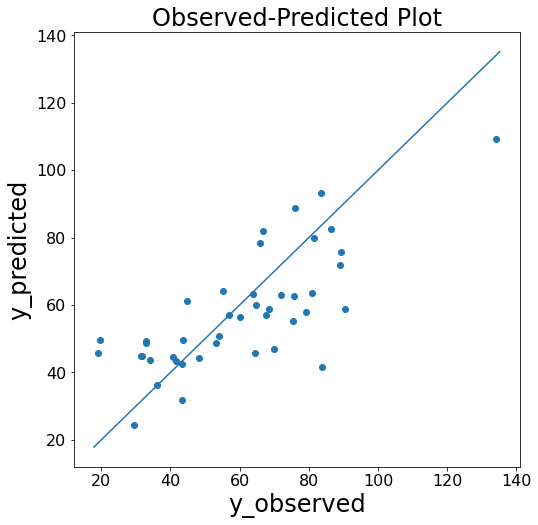

In [114]:
#指数回帰・標準化なし
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

xl = np.log(x) 
yl = np.log(y)

model_lrl = LinearRegression()
model_lrl.fit(xl, yl)

y_pred = np.exp(model_lrl.predict(xl))
yp=model_lrl.predict(xl)

r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(r2,rmse)
print(model_lrl.coef_)
print(model_lrl.intercept_)

fig = yyplot(y, y_pred)

In [140]:
#ロジスティック回帰・標準化,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

sscaler = preprocessing.StandardScaler()
sscaler.fit(x)
xsg = sscaler.transform(x) 
sscaler.fit(y)
ysg = sscaler.transform(y)

ysg1 = np.ravel(ysg)
xsg1 = np.ravel(xsg)

model_lgs = LogisticRegression()
model_lgs.fit(xsg, ysg1)

y_pred = sscaler.inverse_transform(model_lgs.predict(x))

r2 = r2_score(ysg, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(r2,rmse)

fig = yyplot(ysg, y_pred)

ValueError: Unknown label type: 'continuous'

In [145]:
xsg[0]

array([-0.04291383, -0.18365437, -0.49463848, -0.48746985])

In [144]:
ysg1[0]

0.8282842855139904